In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

2024-09-19 21:29:45.936644: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
df = pd.read_csv('auto-mpg.data',
                 names=['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight',
                'Acceleration', 'Model Year', 'Origin'],
                 sep=' ',
                 na_values='?',
                 comment='\t',
                 skipinitialspace=True
                 )

In [3]:
df.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1


In [4]:
df.shape

(398, 8)

In [5]:
df.isna().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      6
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

In [6]:
df.dropna(inplace=True)
df.shape

(392, 8)

In [7]:
continues_cols= [x for x in df.columns if x !='Origin']

In [8]:
continues_cols

['MPG',
 'Cylinders',
 'Displacement',
 'Horsepower',
 'Weight',
 'Acceleration',
 'Model Year']

In [9]:
df_model_base= df[continues_cols]

In [10]:
df_model_base.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year
0,18.0,8,307.0,130.0,3504.0,12.0,70
1,15.0,8,350.0,165.0,3693.0,11.5,70
2,18.0,8,318.0,150.0,3436.0,11.0,70
3,16.0,8,304.0,150.0,3433.0,12.0,70
4,17.0,8,302.0,140.0,3449.0,10.5,70


In [11]:
train = df_model_base.sample(frac=0.8, random_state=100)
train.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year
125,20.0,6,198.0,95.0,3102.0,16.5,74
142,26.0,4,79.0,67.0,1963.0,15.5,74
278,31.5,4,89.0,71.0,1990.0,14.9,78
254,20.2,6,200.0,85.0,2965.0,15.8,78
328,30.0,4,146.0,67.0,3250.0,21.8,80


In [12]:
test = df_model_base.drop(train.index)
test.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year
0,18.0,8,307.0,130.0,3504.0,12.0,70
2,18.0,8,318.0,150.0,3436.0,11.0,70
4,17.0,8,302.0,140.0,3449.0,10.5,70
8,14.0,8,455.0,225.0,4425.0,10.0,70
13,14.0,8,455.0,225.0,3086.0,10.0,70


In [13]:
print(train.shape)
print(test.shape)

(314, 7)
(78, 7)


In [14]:
train.describe()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year
count,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000
mean,23.579299,5.455414,192.562102,103.767516,2959.312102,15.518471,75.964968
std,7.877216,1.691811,103.701434,38.123560,856.880939,2.705097,3.672110
min,9.000000,3.000000,68.000000,46.000000,1649.000000,8.000000,70.000000
25%,17.125000,4.000000,98.000000,75.000000,2193.000000,13.900000,73.000000
50%,23.000000,4.000000,146.000000,94.500000,2764.500000,15.500000,76.000000
75%,29.375000,8.000000,260.000000,120.000000,3612.000000,17.000000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


In [15]:
train_X = train.copy()
test_X = test.copy()

In [16]:
train_y = train_X.pop('MPG')
test_y = test_X.pop('MPG')

In [17]:
train_X.dtypes

Cylinders         int64
Displacement    float64
Horsepower      float64
Weight          float64
Acceleration    float64
Model Year        int64
dtype: object

In [18]:
norm = tf.keras.layers.Normalization()

In [19]:
norm.adapt(np.array(train_X))

In [20]:
train_X[:1]

,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year
125,6,198.0,95.0,3102.0,16.5,74


## Modelos con todas las variables menos categoricas
## Modelo Base

In [21]:
linear_model = tf.keras.Sequential([
    norm,
    tf.keras.layers.Dense(units=1)
])

In [22]:
linear_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ normalization (Normalization)   │ (314, 6)               │            13 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13 (56.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 13 (56.00 B)

In [23]:
linear_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error')

In [24]:
%%time
history = linear_model.fit(
    train_X,
    train_y,
    epochs=100,
    validation_split = 0.2)

Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 23.4501 - val_loss: 21.5068
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 23.2641 - val_loss: 20.9407
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 22.4496 - val_loss: 20.2194
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 20.7474 - val_loss: 19.4958
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 20.3574 - val_loss: 18.8509
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 19.8618 - val_loss: 18.1331
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 18.5725 - val_loss: 17.4274
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 18.1963 - val_loss: 16.7681
Epoch 9/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 17.1175 - val_loss: 16.0160
Epoch 10/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 16.2923 - val_loss: 15.3000
Epoch 11/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 15.3906 - val_loss: 14.6562
Epoch 12/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 14.6

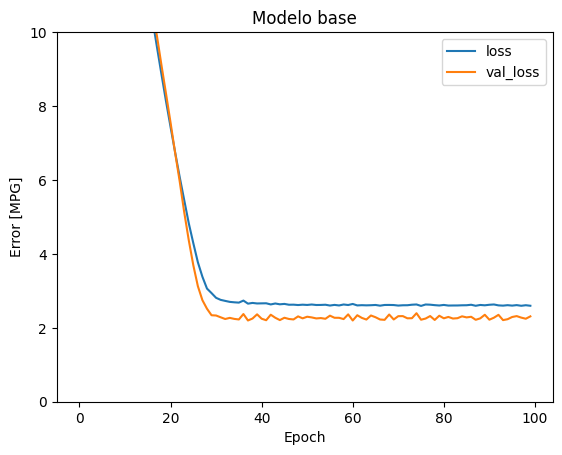

In [25]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.ylim([0, 10])
plt.xlabel('Epoch')
plt.ylabel('Error [MPG]')
plt.title("Modelo base")
plt.legend()

In [26]:
test_res = {}
test_res['modelo_base'] = linear_model.evaluate(
    test_X, test_y, verbose=0)

In [27]:
test_res

{'modelo_base': 2.782327175140381}

In [28]:
linear_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ normalization (Normalization)   │ (None, 6)              │            13 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │             7 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 36 (152.00 B)

 Trainable params: 7 (28.00 B)

 Non-trainable params: 13 (56.00 B)

 Optimizer params: 16 (68.00 B)

## Modelo 1 con 6 neuronas

In [29]:
linear_model_6N = tf.keras.Sequential([
    norm,
    tf.keras.layers.Dense(units=6)
])

In [30]:
linear_model_6N.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error')

In [31]:
%%time
history = linear_model_6N.fit(
    train_X,
    train_y,
    epochs=100,
    validation_split = 0.2)

Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 23.5325 - val_loss: 21.8648
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 22.4725 - val_loss: 21.2115
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 21.9392 - val_loss: 20.5877
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 21.0728 - val_loss: 19.8923
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 20.1208 - val_loss: 19.2699
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 19.1063 - val_loss: 18.6236
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 18.2066 - val_loss: 17.9161
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 17.8964 - val_loss: 17.2303
Epoch 9/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 17.2740 - val_loss: 16.4977
Epoch 10/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 16.1365 - val_loss: 15.9002
Epoch 11/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 15.2740 - val_loss: 15.1768
Epoch 12/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 14.7

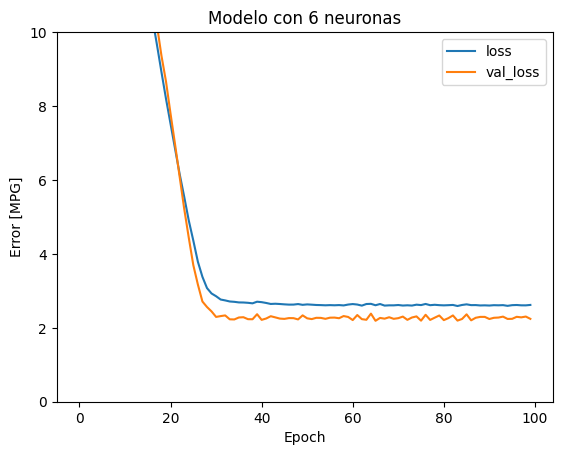

In [32]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.ylim([0, 10])
plt.xlabel('Epoch')
plt.ylabel('Error [MPG]')
plt.title("Modelo con 6 neuronas")
plt.legend()

In [33]:
test_res['modelo 6 neuronas'] = linear_model_6N.evaluate(
    test_X, test_y, verbose=0)
test_res

{'modelo_base': 2.782327175140381, 'modelo 6 neuronas': 2.7291948795318604}

In [34]:
linear_model_6N.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ normalization (Normalization)   │ (None, 6)              │            13 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 6)              │            42 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 141 (572.00 B)

 Trainable params: 42 (168.00 B)

 Non-trainable params: 13 (56.00 B)

 Optimizer params: 86 (348.00 B)

## Modelo con 3 neuronas

In [35]:
linear_model_3N = tf.keras.Sequential([
    norm,
    tf.keras.layers.Dense(units=3)
])

In [36]:
linear_model_3N.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error')

In [37]:
%%time
history = linear_model_3N.fit(
    train_X,
    train_y,
    epochs=100,
    validation_split = 0.2)

Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 23.6752 - val_loss: 21.8807
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 23.2041 - val_loss: 21.1453
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 22.2497 - val_loss: 20.4526
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 21.4778 - val_loss: 19.7834
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 20.3910 - val_loss: 19.0873
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 19.3380 - val_loss: 18.3784
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 18.6584 - val_loss: 17.6823
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 18.0343 - val_loss: 17.0148
Epoch 9/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 17.2540 - val_loss: 16.3173
Epoch 10/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 16.0944 - val_loss: 15.6289
Epoch 11/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 15.2083 - val_loss: 14.9731
Epoch 12/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 14.5

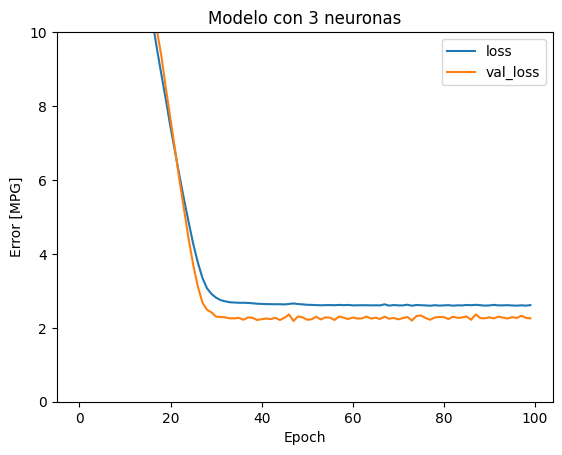

In [38]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.ylim([0, 10])
plt.xlabel('Epoch')
plt.ylabel('Error [MPG]')
plt.title("Modelo con 3 neuronas")
plt.legend()

In [39]:
test_res['modelo 3 neuronas'] = linear_model_3N.evaluate(
    test_X, test_y, verbose=0)
test_res

{'modelo_base': 2.782327175140381,
 'modelo 6 neuronas': 2.7291948795318604,
 'modelo 3 neuronas': 2.7332277297973633}

In [40]:
linear_model_3N.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ normalization (Normalization)   │ (None, 6)              │            13 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 3)              │            21 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 78 (320.00 B)

 Trainable params: 21 (84.00 B)

 Non-trainable params: 13 (56.00 B)

 Optimizer params: 44 (180.00 B)

## Modelo 18 neuronas

In [41]:
linear_model_18N = tf.keras.Sequential([
    norm,
    tf.keras.layers.Dense(units=18)
])

In [42]:
linear_model_18N.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error')

In [43]:
%%time
history = linear_model_18N.fit(
    train_X,
    train_y,
    epochs=100,
    validation_split = 0.2)

Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - loss: 23.0466 - val_loss: 21.5856
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 22.5346 - val_loss: 20.8695
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 21.9374 - val_loss: 20.1407
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 21.6929 - val_loss: 19.4432
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 20.3430 - val_loss: 18.7658
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 20.1073 - val_loss: 18.1085
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 18.6394 - val_loss: 17.3631
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 17.5541 - val_loss: 16.6181
Epoch 9/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 16.6875 - val_loss: 15.8920
Epoch 10/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 16.4443 - val_loss: 15.1964
Epoch 11/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 15.4087 - val_loss: 14.4735
Epoch 12/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 14.6

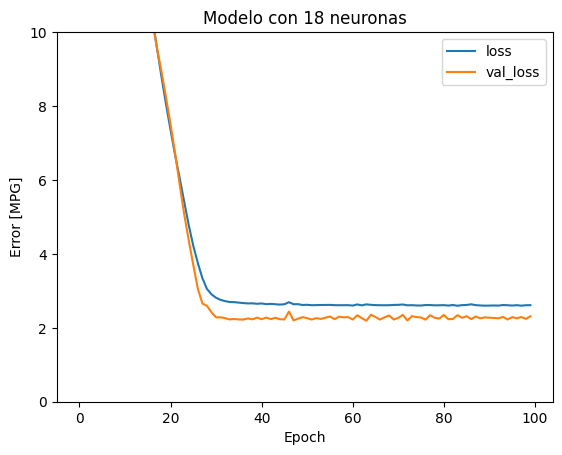

In [44]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.ylim([0, 10])
plt.xlabel('Epoch')
plt.ylabel('Error [MPG]')
plt.title("Modelo con 18 neuronas")
plt.legend()

In [45]:
test_res['modelo 18 neuronas'] = linear_model_18N.evaluate(
    test_X, test_y, verbose=0)
test_res

{'modelo_base': 2.782327175140381,
 'modelo 6 neuronas': 2.7291948795318604,
 'modelo 3 neuronas': 2.7332277297973633,
 'modelo 18 neuronas': 2.7797985076904297}

In [46]:
linear_model_18N.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ normalization (Normalization)   │ (None, 6)              │            13 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 18)             │           126 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 393 (1.54 KB)

 Trainable params: 126 (504.00 B)

 Non-trainable params: 13 (56.00 B)

 Optimizer params: 254 (1020.00 B)

## Modificamos unicamente el numero de capas

## Modelo con 3 capaz

In [47]:
modelo_3_layers = tf.keras.Sequential([
      norm,
      tf.keras.layers.Dense(1),
      tf.keras.layers.Dense(1),
      tf.keras.layers.Dense(1)
  ])

In [48]:
modelo_3_layers.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error')

In [49]:
%%time
history = modelo_3_layers.fit(
    train_X,
    train_y,
    epochs=100,
    validation_split = 0.2)

Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 22.9984 - val_loss: 19.0084
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 18.3492 - val_loss: 9.9257
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 8.1907 - val_loss: 5.8159
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 5.4321 - val_loss: 4.0492
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 3.7392 - val_loss: 2.8674
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3.1327 - val_loss: 2.6801
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 2.7718 - val_loss: 2.2964
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 2.7267 - val_loss: 2.5747
Epoch 9/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2.6816 - val_loss: 2.2943
Epoch 10/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2.6126 - val_loss: 2.3878
Epoch 11/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 2.6515 - val_loss: 2.2453
Epoch 12/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2.7518 - val_loss: 2.36

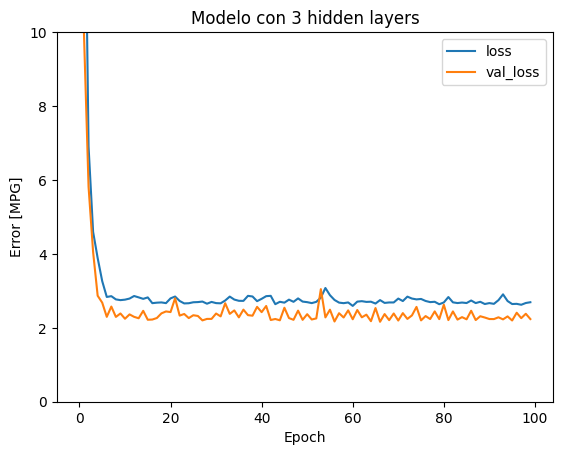

In [50]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.ylim([0, 10])
plt.xlabel('Epoch')
plt.ylabel('Error [MPG]')
plt.title("Modelo con 3 hidden layers")
plt.legend()

In [51]:
test_res['modelo 3 hidden layers'] = modelo_3_layers.evaluate(
    test_X, test_y, verbose=0)
test_res

{'modelo_base': 2.782327175140381,
 'modelo 6 neuronas': 2.7291948795318604,
 'modelo 3 neuronas': 2.7332277297973633,
 'modelo 18 neuronas': 2.7797985076904297,
 'modelo 3 hidden layers': 2.783496856689453}

In [52]:
modelo_3_layers.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ normalization (Normalization)   │ (None, 6)              │            13 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │             7 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │             2 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │             2 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 48 (200.00 B)

 Trainable params: 11 (44.00 B)

 Non-trainable params: 13 (56.00 B)

 Optimizer params: 24 (100.00 B)

## Modelo con 6 capaz

In [53]:
modelo_6_layers = tf.keras.Sequential([
      norm,
      tf.keras.layers.Dense(1),
      tf.keras.layers.Dense(1),
      tf.keras.layers.Dense(1),
      tf.keras.layers.Dense(1),
      tf.keras.layers.Dense(1),
      tf.keras.layers.Dense(1)
  ])

In [54]:
modelo_6_layers.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error')

In [55]:
%%time
history = modelo_6_layers.fit(
    train_X,
    train_y,
    epochs=100,
    validation_split = 0.2)

Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 22.8536 - val_loss: 14.9022
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 11.9326 - val_loss: 5.6048
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 4.9693 - val_loss: 4.6311
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 4.3993 - val_loss: 3.0380
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 3.7189 - val_loss: 2.9627
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 3.0376 - val_loss: 3.5979
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 3.4131 - val_loss: 2.6158
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.0983 - val_loss: 2.5584
Epoch 9/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 3.1572 - val_loss: 2.2645
Epoch 10/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 2.6055 - val_loss: 2.6008
Epoch 11/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 3.1317 - val_loss: 2.6684
Epoch 12/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2.9615 - val_loss: 2.21

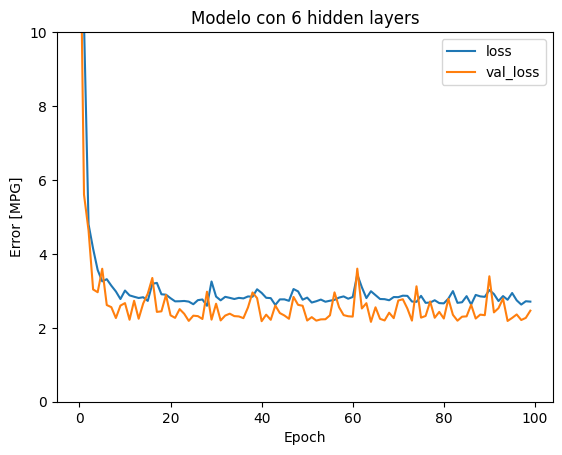

In [56]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.ylim([0, 10])
plt.xlabel('Epoch')
plt.ylabel('Error [MPG]')
plt.title("Modelo con 6 hidden layers")
plt.legend()

In [57]:
test_res['modelo 6 hidden layers'] = modelo_6_layers.evaluate(
    test_X, test_y, verbose=0)
test_res

{'modelo_base': 2.782327175140381,
 'modelo 6 neuronas': 2.7291948795318604,
 'modelo 3 neuronas': 2.7332277297973633,
 'modelo 18 neuronas': 2.7797985076904297,
 'modelo 3 hidden layers': 2.783496856689453,
 'modelo 6 hidden layers': 2.8818235397338867}

In [58]:
modelo_6_layers.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ normalization (Normalization)   │ (None, 6)              │            13 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │             7 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │             2 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │             2 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 1)              │             2 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │             2 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 1)              │             2 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 66 (272.00 B)

 Trainable params: 17 (68.00 B)

 Non-trainable params: 13 (56.00 B)

 Optimizer params: 36 (148.00 B)

## Modelo con 18 hidden layers

In [59]:
modelo_18_layers = tf.keras.Sequential([
      norm,
      tf.keras.layers.Dense(1),
      tf.keras.layers.Dense(1),
      tf.keras.layers.Dense(1),
      tf.keras.layers.Dense(1),
      tf.keras.layers.Dense(1),
      tf.keras.layers.Dense(1),
      tf.keras.layers.Dense(1),
      tf.keras.layers.Dense(1),
      tf.keras.layers.Dense(1),
      tf.keras.layers.Dense(1),
      tf.keras.layers.Dense(1),
      tf.keras.layers.Dense(1),
      tf.keras.layers.Dense(1),
      tf.keras.layers.Dense(1),
      tf.keras.layers.Dense(1),
      tf.keras.layers.Dense(1),
      tf.keras.layers.Dense(1),
      tf.keras.layers.Dense(1)
  ])

In [60]:
modelo_18_layers.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error')

In [61]:
%%time
history = modelo_18_layers.fit(
    train_X,
    train_y,
    epochs=100,
    validation_split = 0.2)

Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 7s 38ms/step - loss: 22.8419 - val_loss: 6.9667
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 12.0061 - val_loss: 11.9440
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 11.8734 - val_loss: 6.8133
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 7.9437 - val_loss: 6.5474
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 6.7167 - val_loss: 6.6679
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 7.0313 - val_loss: 7.2874
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 6.8293 - val_loss: 6.5612
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 6.7991 - val_loss: 6.6680
Epoch 9/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 6.3470 - val_loss: 6.7409
Epoch 10/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 6.3505 - val_loss: 6.5966
Epoch 11/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 5.9380 - val_loss: 6.8390
Epoch 12/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 6.3973 - val_loss: 6

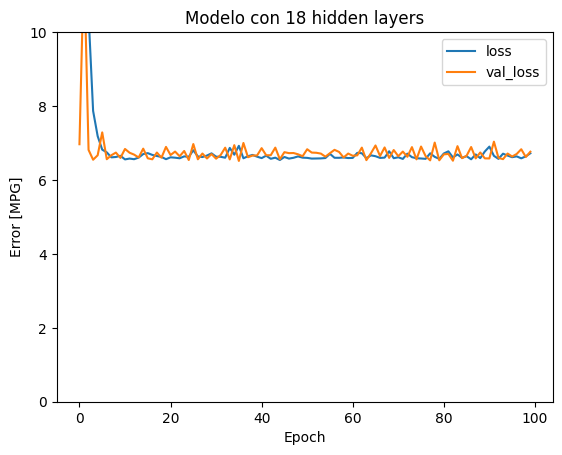

In [62]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.ylim([0, 10])
plt.xlabel('Epoch')
plt.ylabel('Error [MPG]')
plt.title("Modelo con 18 hidden layers")
plt.legend()

In [63]:
test_res['modelo 18 hidden layers'] = modelo_18_layers.evaluate(
    test_X, test_y, verbose=0)
test_res

{'modelo_base': 2.782327175140381,
 'modelo 6 neuronas': 2.7291948795318604,
 'modelo 3 neuronas': 2.7332277297973633,
 'modelo 18 neuronas': 2.7797985076904297,
 'modelo 3 hidden layers': 2.783496856689453,
 'modelo 6 hidden layers': 2.8818235397338867,
 'modelo 18 hidden layers': 6.364817142486572}

In [64]:
modelo_18_layers.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ normalization (Normalization)   │ (None, 6)              │            13 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 1)              │             7 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 1)              │             2 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 1)              │             2 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 1)              │             2 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 1)              │             2 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 1)              │             2 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 1)              │             2 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 1)              │             2 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 1)              │             2 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 1)              │             2 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 1)              │             2 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 1)              │             2 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 1)              │             2 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 1)              │             2 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 1)              │             2 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 1)              │             2 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 1)              │             2 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_30 (Dense)                │ (None, 1)              │             2 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 138 (560.00 B)

 Trainable params: 41 (164.00 B)

 Non-trainable params: 13 (56.00 B)

 Optimizer params: 84 (340.00 B)

## Modificando el tipo de funcion de activacion

## Funcion de activacion SGD

In [65]:
modelo_sgd= tf.keras.Sequential([
    norm,
    tf.keras.layers.Dense(units=1)
])

In [66]:
modelo_sgd.compile(
    optimizer=tf.keras.optimizers.SGD(learning_rate=0.01,momentum=0.5),
    loss='mean_absolute_error')

In [67]:
%%time
history = modelo_sgd.fit(
    train_X,
    train_y,
    epochs=100,
    validation_split = 0.2)

Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 23.7449 - val_loss: 22.1569
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 23.3282 - val_loss: 22.0002
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 23.7240 - val_loss: 21.8439
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 24.3708 - val_loss: 21.6877
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 23.3064 - val_loss: 21.5301
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 23.0808 - val_loss: 21.3736
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 22.7909 - val_loss: 21.2177
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 22.6577 - val_loss: 21.0612
Epoch 9/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 22.1276 - val_loss: 20.9046
Epoch 10/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 23.3831 - val_loss: 20.7527
Epoch 11/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 22.7107 - val_loss: 20.5945
Epoch 12/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 21.7

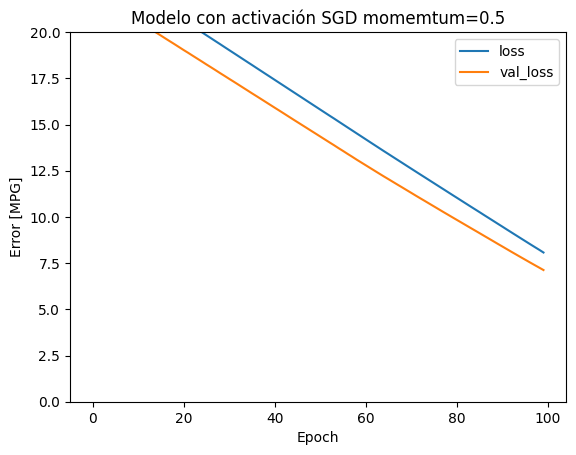

In [68]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.ylim([0, 20])
plt.xlabel('Epoch')
plt.ylabel('Error [MPG]')
plt.title("Modelo con activación SGD momemtum=0.5")
plt.legend()

In [69]:
test_res['modelo con SGD'] = modelo_sgd.evaluate(
    test_X, test_y, verbose=0)
test_res

{'modelo_base': 2.782327175140381,
 'modelo 6 neuronas': 2.7291948795318604,
 'modelo 3 neuronas': 2.7332277297973633,
 'modelo 18 neuronas': 2.7797985076904297,
 'modelo 3 hidden layers': 2.783496856689453,
 'modelo 6 hidden layers': 2.8818235397338867,
 'modelo 18 hidden layers': 6.364817142486572,
 'modelo con SGD': 7.255080223083496}

In [70]:
modelo_sgd.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ normalization (Normalization)   │ (None, 6)              │            13 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_31 (Dense)                │ (None, 1)              │             7 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 29 (124.00 B)

 Trainable params: 7 (28.00 B)

 Non-trainable params: 13 (56.00 B)

 Optimizer params: 9 (40.00 B)

## Modelo con  RMSprop

In [71]:
modelo_rmsprop= tf.keras.Sequential([
    norm,
    tf.keras.layers.Dense(units=1)
])

In [72]:
modelo_rmsprop.compile(
    optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.001, rho=0.01),
    loss='mean_absolute_error')

In [73]:
%%time
history = modelo_rmsprop.fit(
    train_X,
    train_y,
    epochs=100,
    validation_split = 0.2)

Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 24.7090 - val_loss: 22.3307
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 23.6883 - val_loss: 22.3237
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 23.6512 - val_loss: 22.3158
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 23.7730 - val_loss: 22.3085
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 24.1117 - val_loss: 22.3017
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 23.6233 - val_loss: 22.2958
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 23.9132 - val_loss: 22.2887
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 24.0889 - val_loss: 22.2822
Epoch 9/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 22.9701 - val_loss: 22.2766
Epoch 10/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 23.8297 - val_loss: 22.2688
Epoch 11/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 23.7038 - val_loss: 22.2614
Epoch 12/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 23.0

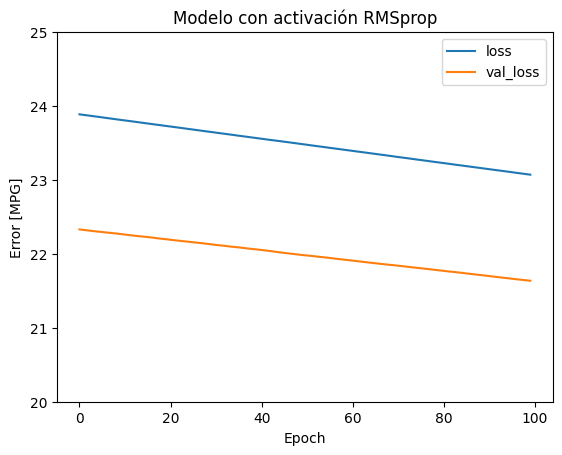

In [74]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.ylim([20, 25])
plt.xlabel('Epoch')
plt.ylabel('Error [MPG]')
plt.title("Modelo con activación RMSprop")
plt.legend()

In [75]:
test_res['modelo con RMSprop'] = modelo_rmsprop.evaluate(
    test_X, test_y, verbose=0)
test_res

{'modelo_base': 2.782327175140381,
 'modelo 6 neuronas': 2.7291948795318604,
 'modelo 3 neuronas': 2.7332277297973633,
 'modelo 18 neuronas': 2.7797985076904297,
 'modelo 3 hidden layers': 2.783496856689453,
 'modelo 6 hidden layers': 2.8818235397338867,
 'modelo 18 hidden layers': 6.364817142486572,
 'modelo con SGD': 7.255080223083496,
 'modelo con RMSprop': 22.048364639282227}

In [76]:
modelo_rmsprop.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ normalization (Normalization)   │ (None, 6)              │            13 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_32 (Dense)                │ (None, 1)              │             7 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 29 (124.00 B)

 Trainable params: 7 (28.00 B)

 Non-trainable params: 13 (56.00 B)

 Optimizer params: 9 (40.00 B)

## Modelo con Nadam

In [77]:
modelo_nadam= tf.keras.Sequential([
    norm,
    tf.keras.layers.Dense(units=1)
])

In [78]:
modelo_nadam.compile(
    optimizer = tf.keras.optimizers.Nadam(learning_rate=0.00001),
    loss='mean_absolute_error')

In [79]:
%%time
history = modelo_nadam.fit(
    train_X,
    train_y,
    epochs=100,
    validation_split = 0.2)

Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 23.5453 - val_loss: 22.1676
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 23.2901 - val_loss: 22.1676
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 23.8499 - val_loss: 22.1675
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 23.2138 - val_loss: 22.1674
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 23.1724 - val_loss: 22.1674
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 24.0847 - val_loss: 22.1673
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 23.8745 - val_loss: 22.1672
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 24.2426 - val_loss: 22.1672
Epoch 9/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 23.8933 - val_loss: 22.1671
Epoch 10/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 23.5147 - val_loss: 22.1670
Epoch 11/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 23.9311 - val_loss: 22.1670
Epoch 12/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 23.9

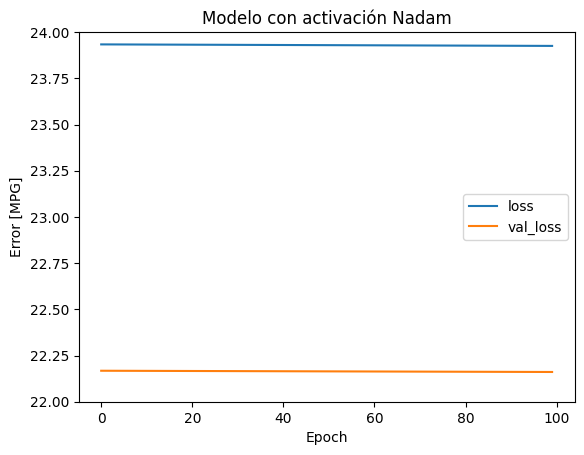

In [80]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.ylim([22, 24])
plt.xlabel('Epoch')
plt.ylabel('Error [MPG]')
plt.title("Modelo con activación Nadam")
plt.legend()

In [81]:
test_res['modelo con Nadam'] = modelo_nadam.evaluate(
    test_X, test_y, verbose=0)
test_res

{'modelo_base': 2.782327175140381,
 'modelo 6 neuronas': 2.7291948795318604,
 'modelo 3 neuronas': 2.7332277297973633,
 'modelo 18 neuronas': 2.7797985076904297,
 'modelo 3 hidden layers': 2.783496856689453,
 'modelo 6 hidden layers': 2.8818235397338867,
 'modelo 18 hidden layers': 6.364817142486572,
 'modelo con SGD': 7.255080223083496,
 'modelo con RMSprop': 22.048364639282227,
 'modelo con Nadam': 22.81260108947754}

In [82]:
modelo_nadam.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ normalization (Normalization)   │ (None, 6)              │            13 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_33 (Dense)                │ (None, 1)              │             7 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 37 (156.00 B)

 Trainable params: 7 (28.00 B)

 Non-trainable params: 13 (56.00 B)

 Optimizer params: 17 (72.00 B)

## Modelos que optimizarian el MAE

## Modelo few hidden layer and couple of neurons

In [83]:
modelo_3_layers_3_neurons = tf.keras.Sequential([
      norm,
      tf.keras.layers.Dense(24, activation='relu'),
      tf.keras.layers.Dense(24, activation='relu'),
      tf.keras.layers.Dense(3)
  ])

In [84]:
modelo_3_layers_3_neurons.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error')

In [85]:
%%time
history = modelo_3_layers_3_neurons.fit(
  train_X,
  train_y,
  validation_split=0.2,
  epochs=100)

Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 18.4311 - val_loss: 7.6328
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 7.6487 - val_loss: 2.7871
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 3.7050 - val_loss: 3.4054
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 3.1783 - val_loss: 2.6005
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2.8376 - val_loss: 1.9826
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2.7064 - val_loss: 2.0924
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2.2951 - val_loss: 2.1296
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2.5596 - val_loss: 2.1967
Epoch 9/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2.7580 - val_loss: 2.0862
Epoch 10/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2.3386 - val_loss: 2.2747
Epoch 11/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2.5107 - val_loss: 2.8447
Epoch 12/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2.3538 - val_loss: 1.8616

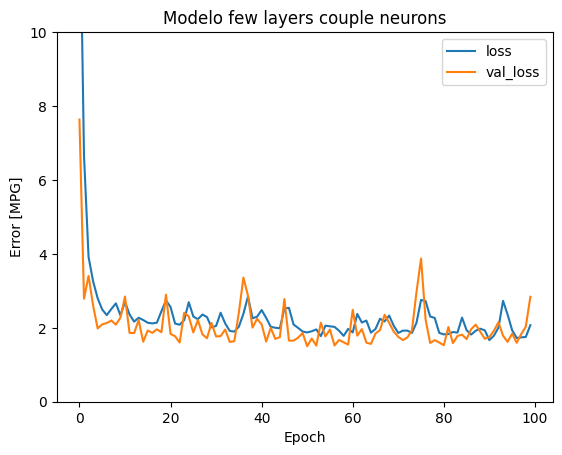

In [86]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.ylim([0, 10])
plt.xlabel('Epoch')
plt.ylabel('Error [MPG]')
plt.title("Modelo few layers couple neurons")
plt.legend()

In [87]:
test_res['modelo few hidden layers couple neurons'] = modelo_3_layers_3_neurons.evaluate(
    test_X, test_y, verbose=0)
test_res

{'modelo_base': 2.782327175140381,
 'modelo 6 neuronas': 2.7291948795318604,
 'modelo 3 neuronas': 2.7332277297973633,
 'modelo 18 neuronas': 2.7797985076904297,
 'modelo 3 hidden layers': 2.783496856689453,
 'modelo 6 hidden layers': 2.8818235397338867,
 'modelo 18 hidden layers': 6.364817142486572,
 'modelo con SGD': 7.255080223083496,
 'modelo con RMSprop': 22.048364639282227,
 'modelo con Nadam': 22.81260108947754,
 'modelo few hidden layers couple neurons': 2.894277811050415}

In [88]:
modelo_3_layers_3_neurons.summary()

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ normalization (Normalization)   │ (None, 6)              │            13 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_34 (Dense)                │ (None, 24)             │           168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_35 (Dense)                │ (None, 24)             │           600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_36 (Dense)                │ (None, 3)              │            75 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,544 (9.95 KB)

 Trainable params: 843 (3.29 KB)

 Non-trainable params: 13 (56.00 B)

 Optimizer params: 1,688 (6.60 KB)

## Model with few layers, couple of neurons

In [89]:
modelo_3_layers_3_neurons_SGD = tf.keras.Sequential([
      norm,
      tf.keras.layers.Dense(24, activation='relu'),
      tf.keras.layers.Dense(24, activation='relu'),
      tf.keras.layers.Dense(3)
  ])

In [90]:
modelo_3_layers_3_neurons_SGD.compile(
    optimizer=tf.keras.optimizers.SGD(learning_rate=0.01,momentum=0.5),
    loss='mean_absolute_error')

In [91]:
%%time
history = modelo_3_layers_3_neurons_SGD.fit(
  train_X,
  train_y,
  validation_split=0.2,
  epochs=100)

Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 23.4875 - val_loss: 22.1552
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 23.3966 - val_loss: 21.8483
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 23.0087 - val_loss: 21.4735
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 22.8648 - val_loss: 20.9756
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 22.0182 - val_loss: 20.2485
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 21.6364 - val_loss: 19.1128
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 20.0734 - val_loss: 17.1794
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 18.3256 - val_loss: 13.9154
Epoch 9/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 14.6205 - val_loss: 9.3201
Epoch 10/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 8.1811 - val_loss: 4.8460
Epoch 11/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 4.7902 - val_loss: 4.2240
Epoch 12/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 4.5888 - 

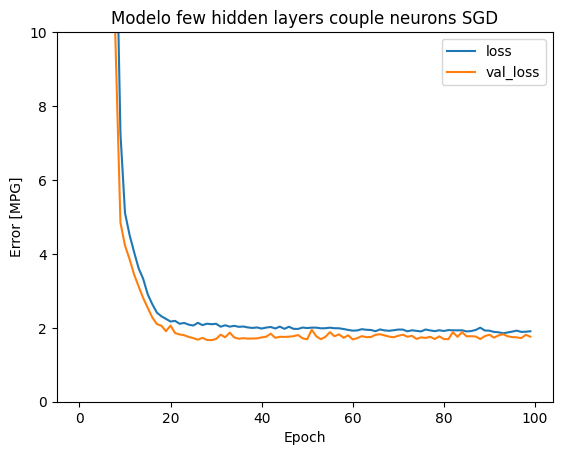

In [92]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.ylim([0, 10])
plt.xlabel('Epoch')
plt.ylabel('Error [MPG]')
plt.title("Modelo few hidden layers couple neurons SGD")
plt.legend()

In [93]:
test_res['modelo few hidden layers couple neurons SGD'] = modelo_3_layers_3_neurons_SGD.evaluate(
    test_X, test_y, verbose=0)
test_res

{'modelo_base': 2.782327175140381,
 'modelo 6 neuronas': 2.7291948795318604,
 'modelo 3 neuronas': 2.7332277297973633,
 'modelo 18 neuronas': 2.7797985076904297,
 'modelo 3 hidden layers': 2.783496856689453,
 'modelo 6 hidden layers': 2.8818235397338867,
 'modelo 18 hidden layers': 6.364817142486572,
 'modelo con SGD': 7.255080223083496,
 'modelo con RMSprop': 22.048364639282227,
 'modelo con Nadam': 22.81260108947754,
 'modelo few hidden layers couple neurons': 2.894277811050415,
 'modelo few hidden layers couple neurons SGD': 2.2519612312316895}

In [94]:
modelo_3_layers_3_neurons_SGD.summary()

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ normalization (Normalization)   │ (None, 6)              │            13 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_37 (Dense)                │ (None, 24)             │           168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_38 (Dense)                │ (None, 24)             │           600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_39 (Dense)                │ (None, 3)              │            75 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,701 (6.65 KB)

 Trainable params: 843 (3.29 KB)

 Non-trainable params: 13 (56.00 B)

 Optimizer params: 845 (3.30 KB)